In [1]:
import requests
import json
import pandas as pd
import multiprocessing


In [2]:
#Web API
url = "https://remotive.com/api/remote-jobs"
# GET Link
response = requests.get(url)

response.status_code


200

In [3]:
# Number of jobs
# Convert the response to JSON
data = response.json()
len(data["jobs"])


27

In [4]:
import os
import json

# Create a folder to store JSON files
os.makedirs("data", exist_ok=True)

# Save raw jobs data to a JSON file
with open("data/raw_jobs.json", "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

"Saved to data/raw_jobs.json"


'Saved to data/raw_jobs.json'

In [5]:
import os

os.path.exists("data/raw_jobs.json"), os.path.getsize("data/raw_jobs.json")


(True, 512847)

In [6]:
with open("data/raw_jobs.json", "r", encoding="utf-8") as f:
    data_loaded = json.load(f)

type(data_loaded), data_loaded.keys()


(dict,
 dict_keys(['00-warning', '0-legal-notice', 'job-count', 'total-job-count', 'jobs']))

In [7]:
# Load JSON data into Pandas DataFrame
import pandas as pd

jobs_df = pd.DataFrame(data_loaded["jobs"])

jobs_df.head()


,id,url,title,company_name,company_logo,category,tags,job_type,publication_date,candidate_required_location,salary,description,company_logo_url
0,2038175,https://remotive.com/remote-jobs/software-deve...,"Software Engineer, iOS Core Product","Speechify, Inc.",https://remotive.com/job/2038175/logo,Software Development,"[cloud, docker, python, AI/ML, research, bash,...",full_time,2025-12-23T08:15:44,Worldwide,,"<p style=""background-color: #ffffff;"">The miss...",NaN
1,2080462,https://remotive.com/remote-jobs/marketing/sen...,Senior Performance Marketer (Full Remote - Wor...,EverAI,https://remotive.com/job/2080462/logo,Marketing,"[AI/ML, automation, customer acquisition, user...",full_time,2025-12-21T16:15:35,Worldwide,,"<p><a class=""_container_j2da7_1"" href=""https:/...",https://remotive.com/job/2080462/logo
2,1987878,https://remotive.com/remote-jobs/education/lan...,Language teachers,AE Virtual Class S.A,https://remotive.com/job/1987878/logo,Education,[teaching],part_time,2025-12-21T05:30:48,Americas,$10k,"<p style=""margin-bottom: 10px; caret-color: #6...",https://remotive.com/job/1987878/logo
3,2088514,https://remotive.com/remote-jobs/sales-busines...,Chief Operating Officer,Shah & Associates CPAs PA,https://remotive.com/job/2088514/logo,Sales / Business,"[accounting, AI/ML, automation, project manage...",full_time,2025-12-19T16:32:23,USA,$190k-$200k,<p><strong>WANTED: One of the BEST Chief Opera...,https://remotive.com/job/2088514/logo
4,2070150,https://remotive.com/remote-jobs/devops/senior...,Senior DevOps Engineer,Marketerx,https://remotive.com/job/2070150/logo,DevOps / Sysadmin,"[AWS, cloud, docker, kubernetes, security, SRE...",full_time,2025-12-18T14:30:38,USA,$130k - $150k,"<div class=""h3"" dir=""ltr"" style=""line-height: ...",NaN


In [8]:
jobs_df.columns


Index(['id', 'url', 'title', 'company_name', 'company_logo', 'category',
       'tags', 'job_type', 'publication_date', 'candidate_required_location',
       'salary', 'description', 'company_logo_url'],
      dtype='object')

In [9]:
jobs_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           27 non-null     int64 
 1   url                          27 non-null     object
 2   title                        27 non-null     object
 3   company_name                 27 non-null     object
 4   company_logo                 27 non-null     object
 5   category                     27 non-null     object
 6   tags                         27 non-null     object
 7   job_type                     27 non-null     object
 8   publication_date             27 non-null     object
 9   candidate_required_location  27 non-null     object
 10  salary                       27 non-null     object
 11  description                  27 non-null     object
 12  company_logo_url             20 non-null     object
dtypes: int64(1), object(12)
memory usage:

In [10]:
# Keep only important columns (if they exist)
important_cols = [
    "id", "title", "company_name", "category", "job_type",
    "candidate_required_location", "publication_date", "salary",
    "tags", "url"
]

available_cols = [c for c in important_cols if c in jobs_df.columns]
jobs_clean = jobs_df[available_cols].copy()

jobs_clean.head()


,id,title,company_name,category,job_type,candidate_required_location,publication_date,salary,tags,url
0,2038175,"Software Engineer, iOS Core Product","Speechify, Inc.",Software Development,full_time,Worldwide,2025-12-23T08:15:44,,"[cloud, docker, python, AI/ML, research, bash,...",https://remotive.com/remote-jobs/software-deve...
1,2080462,Senior Performance Marketer (Full Remote - Wor...,EverAI,Marketing,full_time,Worldwide,2025-12-21T16:15:35,,"[AI/ML, automation, customer acquisition, user...",https://remotive.com/remote-jobs/marketing/sen...
2,1987878,Language teachers,AE Virtual Class S.A,Education,part_time,Americas,2025-12-21T05:30:48,$10k,[teaching],https://remotive.com/remote-jobs/education/lan...
3,2088514,Chief Operating Officer,Shah & Associates CPAs PA,Sales / Business,full_time,USA,2025-12-19T16:32:23,$190k-$200k,"[accounting, AI/ML, automation, project manage...",https://remotive.com/remote-jobs/sales-busines...
4,2070150,Senior DevOps Engineer,Marketerx,DevOps / Sysadmin,full_time,USA,2025-12-18T14:30:38,$130k - $150k,"[AWS, cloud, docker, kubernetes, security, SRE...",https://remotive.com/remote-jobs/devops/senior...


In [11]:
# 1) Remove rows with missing critical fields
critical = [c for c in ["id", "title", "company_name"] if c in jobs_clean.columns]
jobs_clean = jobs_clean.dropna(subset=critical)

# 2) Remove duplicates by job id
if "id" in jobs_clean.columns:
    jobs_clean = jobs_clean.drop_duplicates(subset=["id"])

# 3) Convert publication_date to datetime
if "publication_date" in jobs_clean.columns:
    jobs_clean["publication_date"] = pd.to_datetime(jobs_clean["publication_date"], errors="coerce")

jobs_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           27 non-null     int64         
 1   title                        27 non-null     object        
 2   company_name                 27 non-null     object        
 3   category                     27 non-null     object        
 4   job_type                     27 non-null     object        
 5   candidate_required_location  27 non-null     object        
 6   publication_date             27 non-null     datetime64[ns]
 7   salary                       27 non-null     object        
 8   tags                         27 non-null     object        
 9   url                          27 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 2.2+ KB


In [12]:
# Keep only important columns (if they exist)
important_cols = [
    "id", "title", "company_name", "category", "job_type",
    "candidate_required_location", "publication_date", "salary",
    "tags", "url"
]

available_cols = [c for c in important_cols if c in jobs_df.columns]
jobs_clean = jobs_df[available_cols].copy()

jobs_clean.head()


,id,title,company_name,category,job_type,candidate_required_location,publication_date,salary,tags,url
0,2038175,"Software Engineer, iOS Core Product","Speechify, Inc.",Software Development,full_time,Worldwide,2025-12-23T08:15:44,,"[cloud, docker, python, AI/ML, research, bash,...",https://remotive.com/remote-jobs/software-deve...
1,2080462,Senior Performance Marketer (Full Remote - Wor...,EverAI,Marketing,full_time,Worldwide,2025-12-21T16:15:35,,"[AI/ML, automation, customer acquisition, user...",https://remotive.com/remote-jobs/marketing/sen...
2,1987878,Language teachers,AE Virtual Class S.A,Education,part_time,Americas,2025-12-21T05:30:48,$10k,[teaching],https://remotive.com/remote-jobs/education/lan...
3,2088514,Chief Operating Officer,Shah & Associates CPAs PA,Sales / Business,full_time,USA,2025-12-19T16:32:23,$190k-$200k,"[accounting, AI/ML, automation, project manage...",https://remotive.com/remote-jobs/sales-busines...
4,2070150,Senior DevOps Engineer,Marketerx,DevOps / Sysadmin,full_time,USA,2025-12-18T14:30:38,$130k - $150k,"[AWS, cloud, docker, kubernetes, security, SRE...",https://remotive.com/remote-jobs/devops/senior...


In [13]:
# 1) Remove rows with missing critical fields
critical = [c for c in ["id", "title", "company_name"] if c in jobs_clean.columns]
jobs_clean = jobs_clean.dropna(subset=critical)

# 2) Remove duplicates by job id
if "id" in jobs_clean.columns:
    jobs_clean = jobs_clean.drop_duplicates(subset=["id"])

# 3) Convert publication_date to datetime
if "publication_date" in jobs_clean.columns:
    jobs_clean["publication_date"] = pd.to_datetime(jobs_clean["publication_date"], errors="coerce")

jobs_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           27 non-null     int64         
 1   title                        27 non-null     object        
 2   company_name                 27 non-null     object        
 3   category                     27 non-null     object        
 4   job_type                     27 non-null     object        
 5   candidate_required_location  27 non-null     object        
 6   publication_date             27 non-null     datetime64[ns]
 7   salary                       27 non-null     object        
 8   tags                         27 non-null     object        
 9   url                          27 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 2.2+ KB


In [14]:
len(jobs_df), len(jobs_clean)


(27, 27)

In [15]:
# Top required skills
top_skills = (
    jobs_clean.dropna(subset=["tags"])
              .explode("tags")
              .groupby("tags")
              .size()
              .sort_values(ascending=False)
              .head(10)
)

top_skills


tags
AI/ML         10
research       6
wordpress      6
startup        5
insurance      5
video          5
travel         5
UI/UX          4
cloud          4
automation     4
dtype: int64

In [16]:
# Jobs by location
jobs_by_location = jobs_clean["candidate_required_location"].value_counts().head(10)
jobs_by_location


candidate_required_location
Worldwide                                             12
USA                                                    5
Americas, Europe, Israel                               2
Europe, UK, Germany, European timezones                2
USA, Canada, USA timezones                             2
Europe, Canada, South Africa, Philippines, Jamaica     1
Americas                                               1
Americas, Europe, Asia, Oceania                        1
Germany                                                1
Name: count, dtype: int64

In [17]:
# Top hiring companies
top_companies = jobs_clean["company_name"].value_counts().head(10)
top_companies


company_name
Coalition Technologies      2
A.Team                      2
Mitre Media                 2
Baymard Institute           2
Speechify, Inc.             1
EverAI                      1
AE Virtual Class S.A        1
SafetyWing                  1
Tardus Wealth Strategies    1
Marketerx                   1
Name: count, dtype: int64

In [18]:
import json
import os

os.makedirs("data", exist_ok=True)

insights = {
    "total_jobs": int(len(jobs_clean)),
    "top_skills": top_skills.to_dict(),
    "jobs_by_location_top10": jobs_by_location.to_dict(),
    "top_companies_top10": top_companies.to_dict()
}

with open("data/insights.json", "w", encoding="utf-8") as f:
    json.dump(insights, f, ensure_ascii=False, indent=2)

"Saved to data/insights.json"


'Saved to data/insights.json'

In [19]:
with open("data/insights.json", "r", encoding="utf-8") as f:
    insights_loaded = json.load(f)

insights_loaded.keys()


dict_keys(['total_jobs', 'top_skills', 'jobs_by_location_top10', 'top_companies_top10'])

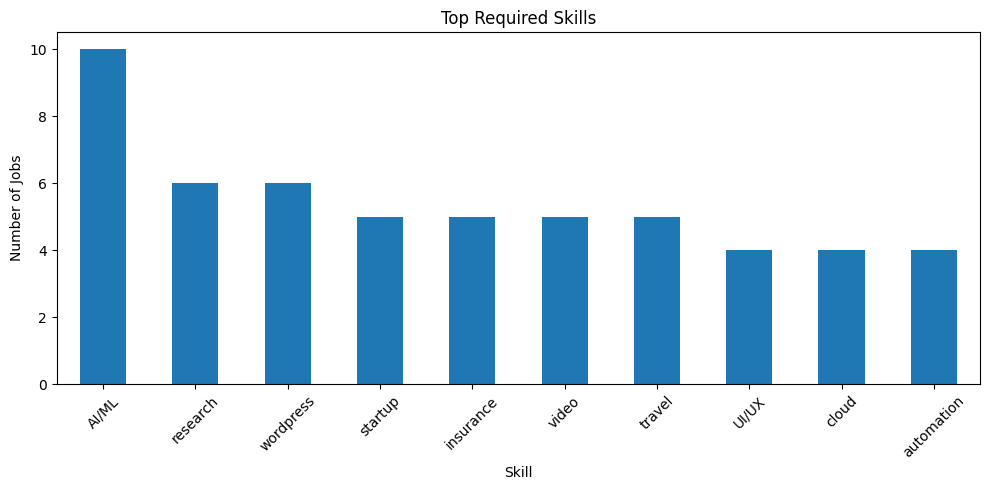

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
top_skills.plot(kind="bar")
plt.title("Top Required Skills")
plt.xlabel("Skill")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


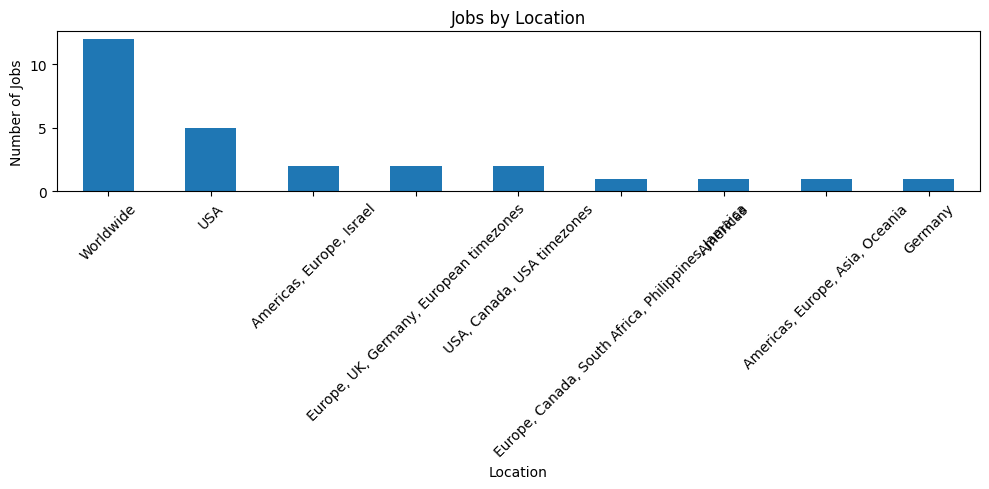

In [21]:
plt.figure(figsize=(10,5))
jobs_by_location.plot(kind="bar")
plt.title("Jobs by Location")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


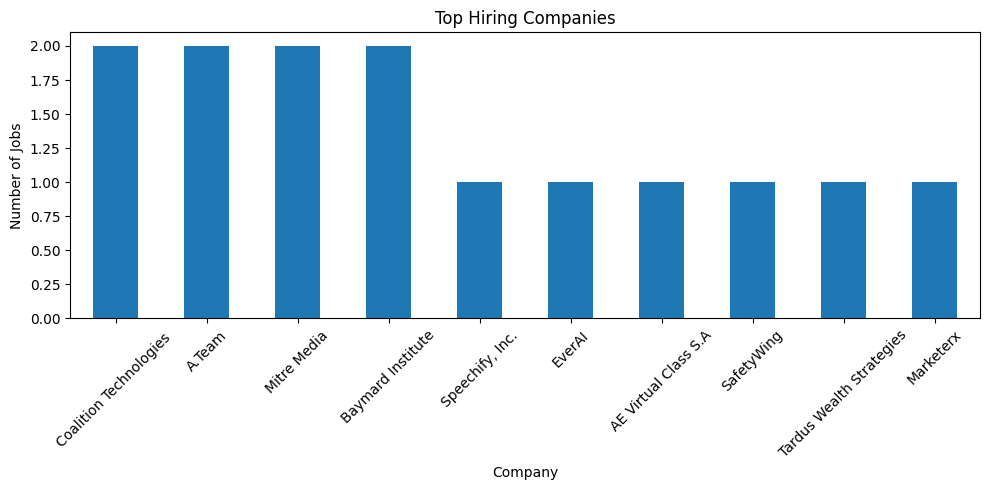

In [22]:
plt.figure(figsize=(10,5))
top_companies.plot(kind="bar")
plt.title("Top Hiring Companies")
plt.xlabel("Company")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
